# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto baquerizo moreno
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | kuraymah
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | ta`u
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | yreka
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | mount darwin
Processing Record 18 of Set 1 | kangding
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | kingscliff
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,25.11,86,22,3.02,EC,1714017006
1,adamstown,-25.0660,-130.1015,22.88,90,2,9.99,PN,1714017172
2,port-aux-francais,-49.3500,70.2167,4.45,66,69,8.23,TF,1714017254
3,lebu,-37.6167,-73.6500,13.62,92,99,3.95,CL,1714017275
4,udachny,66.4167,112.4000,-5.86,80,100,8.51,RU,1714017276


In [6]:
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,25.11,86,22,3.02,EC,2024-04-25
1,adamstown,-25.0660,-130.1015,22.88,90,2,9.99,PN,2024-04-25
2,port-aux-francais,-49.3500,70.2167,4.45,66,69,8.23,TF,2024-04-25
3,lebu,-37.6167,-73.6500,13.62,92,99,3.95,CL,2024-04-25
4,udachny,66.4167,112.4000,-5.86,80,100,8.51,RU,2024-04-25


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,25.11,86,22,3.02,EC,2024-04-25
1,adamstown,-25.0660,-130.1015,22.88,90,2,9.99,PN,2024-04-25
2,port-aux-francais,-49.3500,70.2167,4.45,66,69,8.23,TF,2024-04-25
3,lebu,-37.6167,-73.6500,13.62,92,99,3.95,CL,2024-04-25
4,udachny,66.4167,112.4000,-5.86,80,100,8.51,RU,2024-04-25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

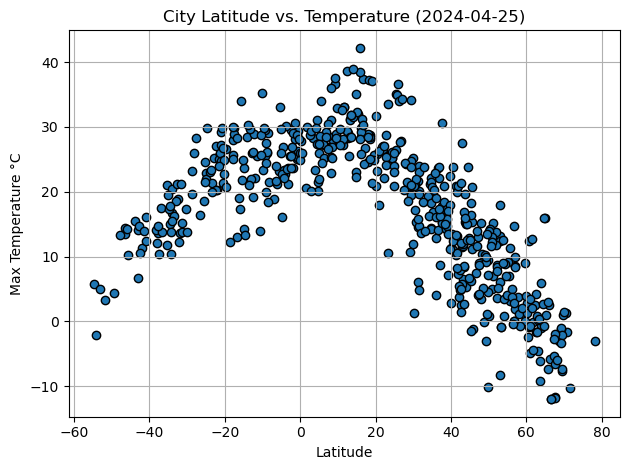

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

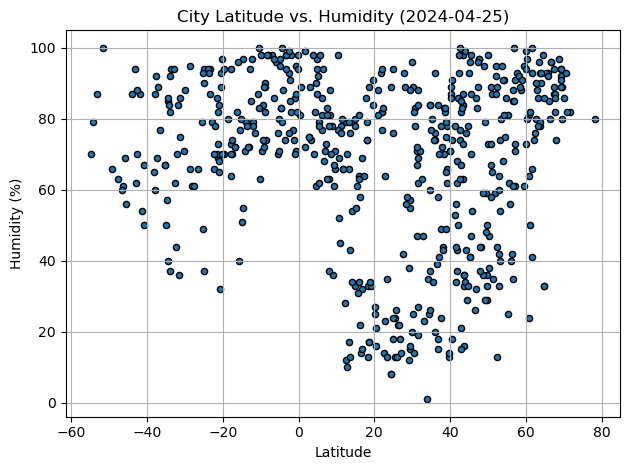

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

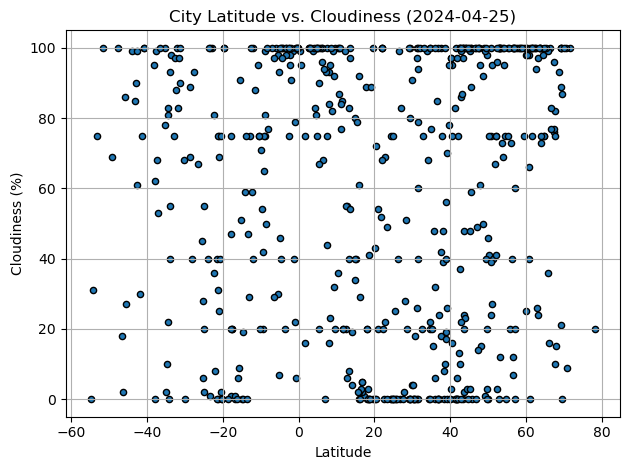

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

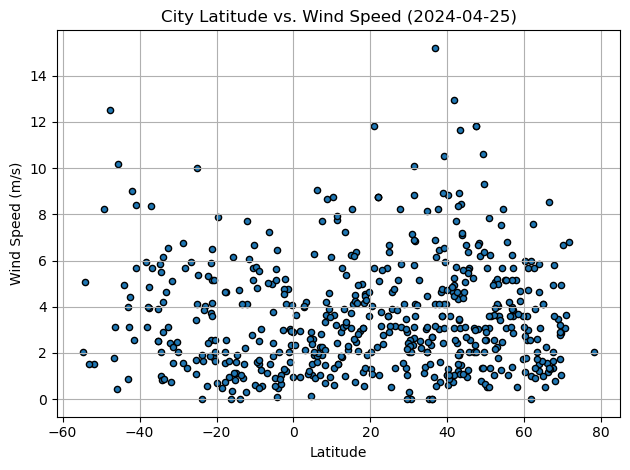

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    # Calculate the position for the equation text
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_text = x_mean
    y_text = slope * x_mean + intercept
    plt.annotate( line_eq,(x_text,y_text), fontsize=14, color='red')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,udachny,66.4167,112.4000,-5.86,80,100,8.51,RU,2024-04-25
5,albany,42.6001,-73.9662,2.58,74,10,2.43,US,2024-04-25
6,kuraymah,18.5500,31.8500,28.17,17,0,4.57,SD,2024-04-25
11,college,64.8569,-147.8028,15.97,33,75,4.12,US,2024-04-25
12,yreka,41.7354,-122.6345,13.10,43,0,3.09,US,2024-04-25


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,25.11,86,22,3.02,EC,2024-04-25
1,adamstown,-25.0660,-130.1015,22.88,90,2,9.99,PN,2024-04-25
2,port-aux-francais,-49.3500,70.2167,4.45,66,69,8.23,TF,2024-04-25
3,lebu,-37.6167,-73.6500,13.62,92,99,3.95,CL,2024-04-25
7,grytviken,-54.2811,-36.5092,-2.16,79,31,5.05,GS,2024-04-25


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8695733721472982


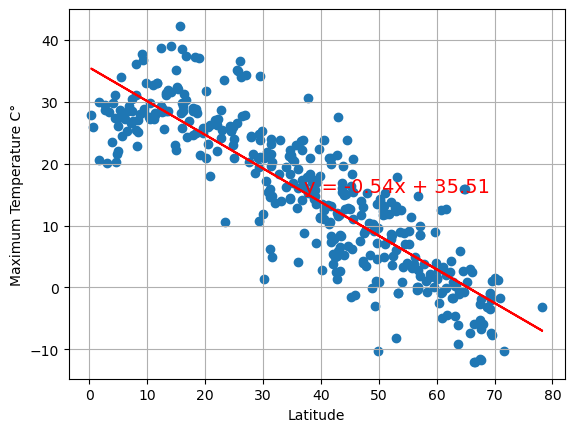

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
lr_funcV2(x,y,name,vbl)



The r-value is: 0.7383922292817503


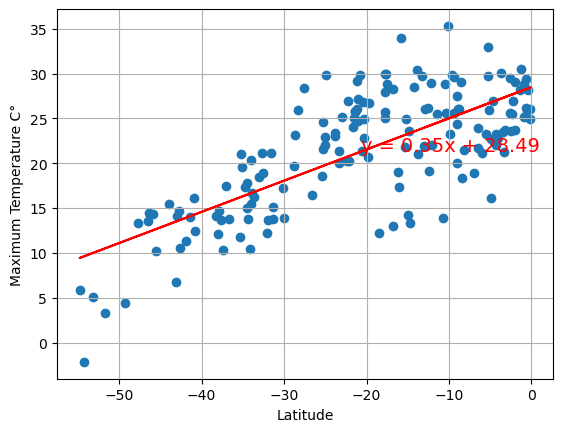

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1941108568504921


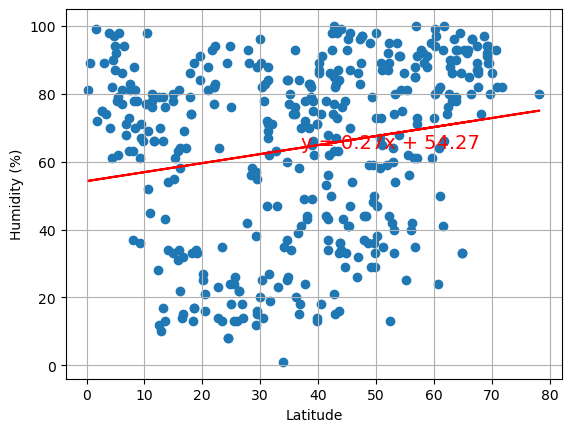

In [18]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
lr_funcV2(x,y,name,vbl)


The r-value is: 0.3301568269273755


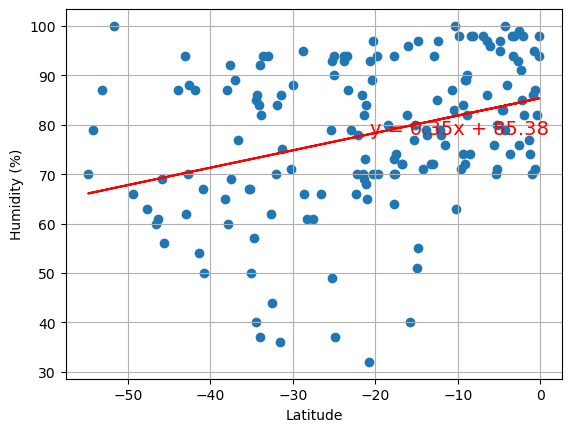

In [19]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13122754006252993


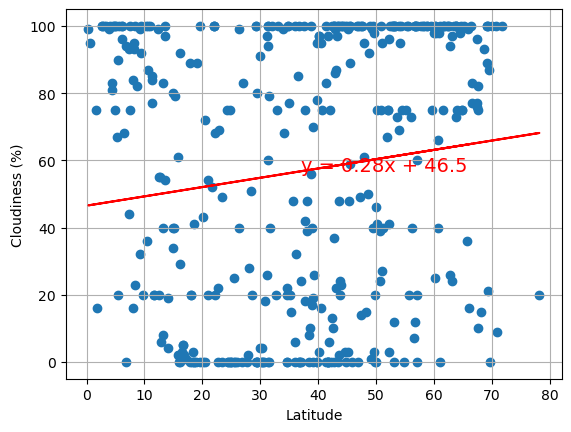

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
lr_funcV2(x,y,name,vbl)


The r-value is: 0.09225388721435485


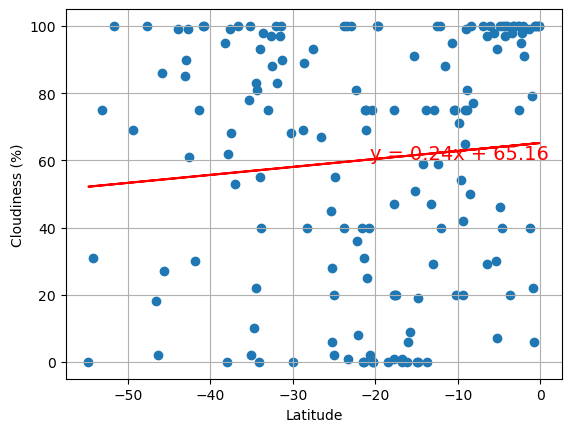

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.020342129084799702


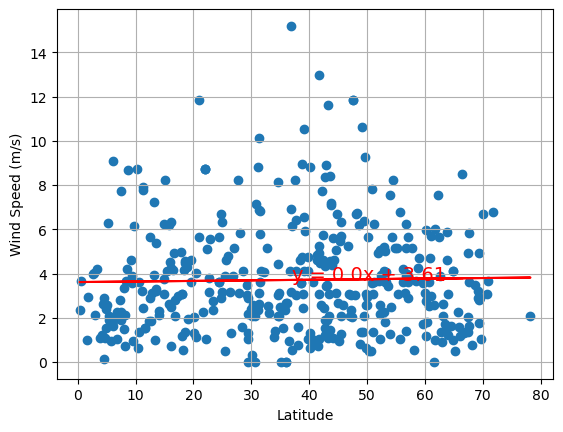

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o')
plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
lr_funcV2(x,y,name,vbl)


The r-value is: -0.23959233538082927


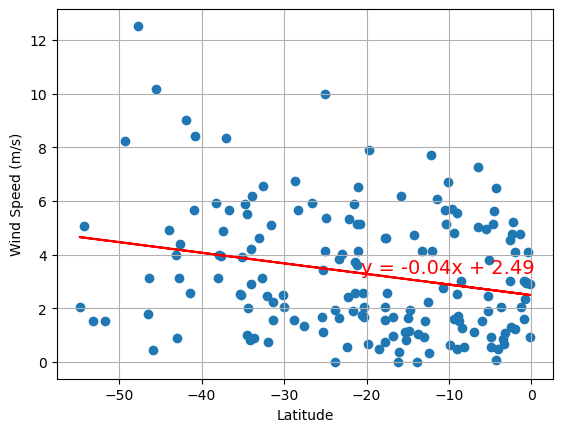

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o')
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
lr_funcV2(x,y,name,vbl)


**Discussion about the linear relationship:** YOUR RESPONSE HERE